In [1]:
## Importing Libraries from the python
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("Housing Boston Data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
### Splitting data in X and y i.e. Output and input variables
y=data["MEDV"]
X=data.drop('MEDV', axis=1)
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [4]:
### Fitting linear regression model on the data
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [5]:
print("Coefficients:",lm.coef_)
print("Intercept:",lm.intercept_)
print("R-Square:",lm.score(X_train,y_train))

Coefficients: [-1.30650530e-01  4.76340743e-02 -4.93430797e-02  9.64036141e-02
 -1.46493397e+01  3.12871134e+00 -2.34294916e-02 -1.45881143e+00
  2.49182099e-01 -1.33353949e-02 -8.35057650e-01  5.70780438e-03
 -3.69953166e-01]
Intercept: 39.26573049013372
R-Square: 0.783642566056671


In [6]:
y_pred=lm.predict(X_train)

In [7]:
np.mean(abs(y_train-y_pred))

2.7580423942443235

In [8]:
#Checking performance of train data
y_pred_train = lm.predict(X_train)
print("Mean Absolute error:", np.mean(abs(y_pred_train-y_train)))
print("Mean Absolute Percentage Error:", np.mean(abs(y_pred_train-y_train)/y_train))
print("Mean Square Error:", metrics.mean_squared_error(y_pred_train,y_train))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(y_pred_train,y_train)))

Mean Absolute error: 2.7580423942443235
Mean Absolute Percentage Error: 0.14163754496700204
Mean Square Error: 13.752284633675034
Root Mean Square Error: 3.7084072906943533


In [9]:
#Checking performance of test data
y_pred = lm.predict(X_test)
print("Mean Absolute error:",np.mean(abs(y_pred-y_test)))
print("Mean Absolute Percentage Error:",np.mean(abs(y_pred-y_test)/y_test))
print("Mean Square Error:",metrics.mean_squared_error(y_pred,y_test))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Mean Absolute error: 2.851646641986025
Mean Absolute Percentage Error: 0.15768791878578428
Mean Square Error: 14.325165111538132
Root Mean Square Error: 3.7848599857244563


In [10]:
##### We will see application of ridge and lasso regression in controlling the overfitting of regression model

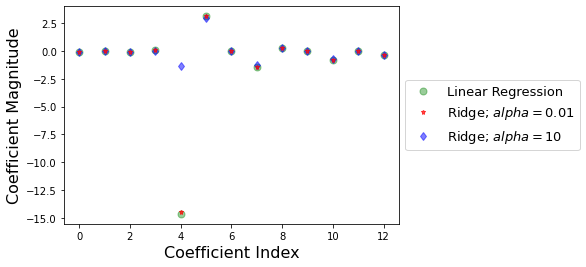

In [12]:
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr10 = Ridge(alpha=10) 
# comparison with alpha value
rr10.fit(X_train, y_train)
### Comparing the coefficients
plt.plot(lm.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $alpha = 0.01$',zorder=7) 
# zorder for ordering the markers
plt.plot(rr10.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $alpha = 10$') 
# alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
rr10.coef_

array([-0.12404949,  0.04893393, -0.12009501,  0.02021249, -1.36800345,
        2.94879641, -0.03211075, -1.23441392,  0.22923497, -0.01494108,
       -0.67687048,  0.00575846, -0.39802504])

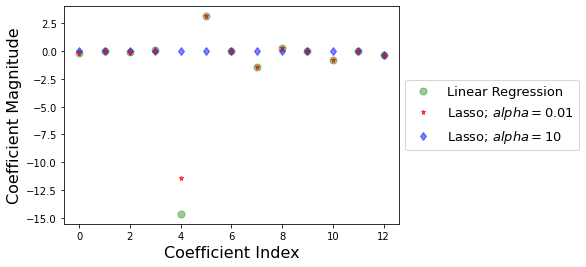

In [14]:
##Runing lasso regression 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)
lasso10 = Lasso(alpha=10, max_iter=10e5)
lasso10.fit(X_train,y_train)
### Comparing the coefficients 
plt.plot(lm.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $alpha = 0.01$',zorder=7) 
# zorder for ordering the markers
plt.plot(lasso10.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $alpha = 10$') 
# alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
lasso10.coef_

array([-0.        ,  0.03462864, -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.01503048,
       -0.        ,  0.0061784 , -0.37719344])

In [16]:
print(np.sum(abs(lm.coef_)))
print(np.sum(abs(rr10.coef_)))
print(np.sum(abs(lasso10.coef_)))

21.057559399690575
7.221445484801269
0.4330309667932878


In [17]:
lasso.coef_

array([-1.28556732e-01,  4.76564283e-02, -6.47057460e-02,  0.00000000e+00,
       -1.13871095e+01,  3.14156647e+00, -2.58043142e-02, -1.40029107e+00,
        2.42515265e-01, -1.37109737e-02, -7.93874909e-01,  5.75294021e-03,
       -3.73517598e-01])

In [18]:
print("Mean Absolute error Linear:",np.mean(abs(lm.predict(X_test)-y_test)))
print("Mean Absolute error Ridge:",np.mean(abs(rr10.predict(X_test)-y_test)))
print("Mean Absolute error Lasso:",np.mean(abs(lasso10.predict(X_test)-y_test)))

Mean Absolute error Linear: 2.851646641986025
Mean Absolute error Ridge: 2.862209628656594
Mean Absolute error Lasso: 3.929932384043739


In [19]:
#### Comouting bias and variance of models

In [20]:
y_pred_lm=lm.predict(X_test)
y_pred_ridge=rr10.predict(X_test)
y_pred_lasso=lasso10.predict(X_test)
print("Bias and variance of lm Model:",np.mean(y_pred_lm)-np.mean(y_test),"Variance:",np.var(y_pred_lm))
print("Bias and variance of ridge Model:",np.mean(y_pred_ridge)-np.mean(y_test),"Variance:",np.var(y_pred_ridge))
print("Bias and variance of lasso Model:",np.mean(y_pred_lasso)-np.mean(y_test),"Variance:",np.var(y_pred_lasso))

Bias and variance of lm Model: 0.2464359406676202 Variance: 38.37288719348247
Bias and variance of ridge Model: 0.32114474591734776 Variance: 37.5220997132702
Bias and variance of lasso Model: 1.112588380235234 Variance: 26.073117477339235


In [21]:
alpha=100
y_pred_ols=lm.predict(X_test)
rr = Ridge(alpha=alpha)
rr.fit(X_train, y_train)
y_pred_ridge=rr.predict(X_test)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
print("Bias and variance of lm Model:",np.mean(y_pred_lm)-np.mean(y_test),"Variance:",np.var(y_pred_lm))
print("Bias and variance of ridge Model:",np.mean(y_pred_ridge)-np.mean(y_test),"Variance:",np.var(y_pred_ridge))
print("Bias and variance of lasso Model:",np.mean(y_pred_lasso)-np.mean(y_test),"Variance:",np.var(y_pred_lasso))

Bias and variance of lm Model: 0.2464359406676202 Variance: 38.37288719348247
Bias and variance of ridge Model: 0.3748711011355219 Variance: 36.4678193969874
Bias and variance of lasso Model: 1.294032556026096 Variance: 16.798776095834445


In [22]:
###### Comparing bias,variance, and MAE of the model for ridge, lasso, and linear model

In [23]:
alphas = np.linspace(0.001, 10, 1000)
lm_bias=[]
lm_variance=[]
lm_mae=[]
rr_bias=[]
rr_variance=[]
rr_mae=[]
lasso_bias=[]
lasso_variance=[]
lasso_mae=[]
for alpha in alphas:
    y_pred_lm=lm.predict(X_test)
    lm_bias.append(np.mean(y_pred_lm)-np.mean(y_test))
    lm_variance.append(np.var(y_pred_lm))
    lm_mae.append(np.mean(abs(y_pred_lm-y_test)))
    rr = Ridge(alpha=alpha)
    rr.fit(X_train, y_train)
    y_pred_ridge=rr.predict(X_test)
    rr_bias.append(np.mean(y_pred_ridge)-np.mean(y_test))
    rr_variance.append(np.var(y_pred_ridge))
    rr_mae.append(np.mean(abs(y_pred_ridge-y_test)))
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred_lasso=lasso.predict(X_test)
    lasso_bias.append(np.mean(y_pred_lasso)-np.mean(y_test))
    lasso_variance.append(np.var(y_pred_lasso))
    lasso_mae.append(np.mean(abs(y_pred_lasso-y_test)))

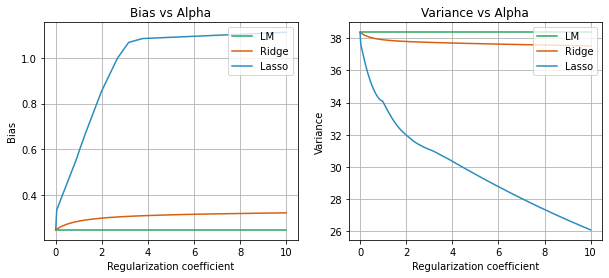

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(alphas, lm_bias, label="LM", color="#2ca25f")
plt.plot(alphas, rr_bias, label="Ridge", color="#d95f0e")
plt.plot(alphas, lasso_bias, label="Lasso", color="#2b8cbe")
plt.xlabel("Regularization coefficient")
plt.ylabel("Bias")
plt.title("Bias vs Alpha")
plt.legend(loc="upper right")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(alphas, lm_variance, label="LM", color="#2ca25f")
plt.plot(alphas, rr_variance, label="Ridge", color="#d95f0e")
plt.plot(alphas, lasso_variance, label="Lasso", color="#2b8cbe")
plt.xlabel("Regularization coefficient")
plt.ylabel("Variance")
plt.title("Variance vs Alpha")
plt.legend(loc="upper right")
plt.grid()

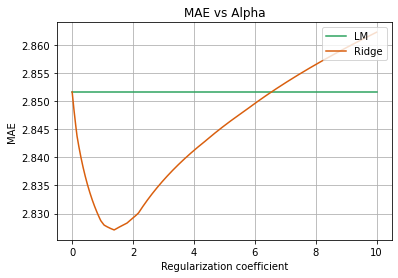

In [25]:
plt.subplot(1, 1, 1)
plt.plot(alphas, lm_mae, label="LM", color="#2ca25f")
plt.plot(alphas, rr_mae, label="Ridge", color="#d95f0e")
#plt.plot(alphas, lasso_mae, label=\"Lasso\", color=\"#2b8cbe\")
plt.xlabel("Regularization coefficient")
plt.ylabel("MAE")
plt.title("MAE vs Alpha")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
Alphas=np.linspace(0.001,5,1000)

In [28]:
param_grid = {'alpha': Alphas}

In [29]:
#Create the base model
rr = Ridge()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rr, param_grid = param_grid,scoring='neg_mean_absolute_error',
                           cv = 3, n_jobs = -1, verbose = 2)

In [30]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


{'alpha': 0.001}

In [31]:
grid_search.best_score_

-2.8288320549856665